In [129]:
#Plot the total number of medals awarded at each of the Olympic games throughout history
# Which countries did not win a medal at the 2008 Olympics, and how many countries were there?

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [131]:
oo = pd.read_csv('data/olympics.csv', skiprows = 4)

In [132]:
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [133]:
# Create mw (medals won) dataframe with medal counts by edition (year)
mw = pd.DataFrame(oo.value_counts('Edition'))
mw.columns = ['MedalsWon']

In [134]:
# Resorts index, which is all over the place right now
mw.sort_index(inplace=True)

<AxesSubplot:xlabel='Edition'>

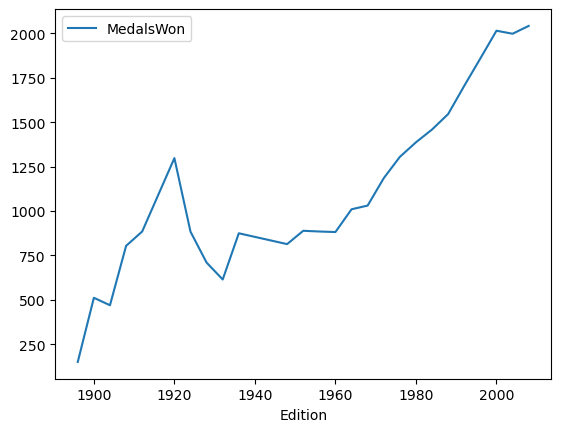

In [135]:
# Years sorted so graph doesn't look insane
mw.plot()

## Question 2 - Which countries did not win a medal in 2008? How many were there?

In [136]:
countries = oo['NOC'].drop_duplicates()

In [137]:
countries

0        HUN
1        AUT
2        GRE
11       USA
14       GER
        ... 
27658    SUD
27903    MRI
28012    TOG
28622    TJK
28965    AFG
Name: NOC, Length: 138, dtype: object

In [138]:
m2008 = oo[oo.Edition == 2008]

In [139]:
m2008.shape

(2042, 10)

In [140]:
countries = pd.DataFrame(countries)

In [141]:
# Gets rid of meaningless numeric index and replaces it with the country codes
countries.set_index('NOC', inplace=True)

In [142]:
# get value counts of countries that won medals from prior 2008 table
countries

""
NOC
HUN
AUT
GRE
USA
GER
...
SUD
MRI
TOG


In [143]:
medals2008 = m2008.NOC.value_counts()
medals2008

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
SUD      1
EGY      1
MDA      1
TOG      1
MRI      1
Name: NOC, Length: 86, dtype: int64

In [144]:
# add new medals df to countries df and wherever values are NaN that means they did not win 
countries['medalswon'] = medals2008

In [145]:
countries.sort_values('medalswon')

,medalswon
NOC,
AFG,1.0
CMR,1.0
TUN,1.0
VEN,1.0
PAN,1.0
...,...
MKD,NaN
SCG,NaN
ERI,NaN


In [146]:
countries[countries.medalswon.isnull()].shape

(52, 1)

# .groupby

In [147]:
list(oo.groupby('Edition'))

[(1896,
         City  Edition          Sport       Discipline  \
  0    Athens     1896       Aquatics         Swimming   
  1    Athens     1896       Aquatics         Swimming   
  2    Athens     1896       Aquatics         Swimming   
  3    Athens     1896       Aquatics         Swimming   
  4    Athens     1896       Aquatics         Swimming   
  ..      ...      ...            ...              ...   
  146  Athens     1896  Weightlifting    Weightlifting   
  147  Athens     1896  Weightlifting    Weightlifting   
  148  Athens     1896      Wrestling  Wrestling Gre-R   
  149  Athens     1896      Wrestling  Wrestling Gre-R   
  150  Athens     1896      Wrestling  Wrestling Gre-R   
  
                        Athlete  NOC Gender                        Event  \
  0               HAJOS, Alfred  HUN    Men               100m freestyle   
  1            HERSCHMANN, Otto  AUT    Men               100m freestyle   
  2           DRIVAS, Dimitrios  GRE    Men   100m freestyle for 

In [148]:
# groupby objects behave like dictionaries. Here I have spliced them out by group_key and group_value
for gk, gv in oo.groupby('Edition'):
    print(gk)
    print(gv)

1896
       City  Edition          Sport       Discipline  \
0    Athens     1896       Aquatics         Swimming   
1    Athens     1896       Aquatics         Swimming   
2    Athens     1896       Aquatics         Swimming   
3    Athens     1896       Aquatics         Swimming   
4    Athens     1896       Aquatics         Swimming   
..      ...      ...            ...              ...   
146  Athens     1896  Weightlifting    Weightlifting   
147  Athens     1896  Weightlifting    Weightlifting   
148  Athens     1896      Wrestling  Wrestling Gre-R   
149  Athens     1896      Wrestling  Wrestling Gre-R   
150  Athens     1896      Wrestling  Wrestling Gre-R   

                      Athlete  NOC Gender                        Event  \
0               HAJOS, Alfred  HUN    Men               100m freestyle   
1            HERSCHMANN, Otto  AUT    Men               100m freestyle   
2           DRIVAS, Dimitrios  GRE    Men   100m freestyle for sailors   
3          MALOKINIS, Ioan

In [149]:
oo.groupby('Edition').size()

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

In [150]:
# Can use agg to add more than one function at a time
# Because most are strings, they are just finding the alphabetical order
oo.groupby(['Edition', 'NOC', 'Medal']).agg(['min', 'max', 'count'])

City                         Sport                 \
                        min      max count            min            max   
Edition NOC Medal                                                          
1896    AUS Gold     Athens   Athens     2      Athletics      Athletics   
        AUT Bronze   Athens   Athens     2        Cycling        Cycling   
            Gold     Athens   Athens     2       Aquatics        Cycling   
            Silver   Athens   Athens     1       Aquatics       Aquatics   
        DEN Bronze   Athens   Athens     3        Fencing       Shooting   
...                     ...      ...   ...            ...            ...   
2008    UZB Silver  Beijing  Beijing     2           Judo      Wrestling   
        VEN Bronze  Beijing  Beijing     1      Taekwondo      Taekwondo   
        VIE Silver  Beijing  Beijing     1  Weightlifting  Weightlifting   
        ZIM Gold    Beijing  Beijing     1       Aquatics       Aquatics   
            Silver  Beijing  Beijing     3       Aquatics       Aquatics   

                             Discipline                         \
                   count            min              max count   
Edition NOC Medal                                                
1896    AUS Gold       2      Athletics        Athletics     2   
        AUT Bronze     2  Cycling Track    Cycling Track     2   
            Gold       2  Cycling Track         Swimming     2   
            Silver     1       Swimming         Swimming     1   
        DEN Bronze     3        Fencing         Shooting     3   
...                  ...            ...              ...   ...   
2008    UZB Silver     2           Judo  Wrestling Free.     2   
        VEN Bronze     1      Taekwondo        Taekwondo     1   
        VIE Silver     1  Weightlifting    Weightlifting     1   
        ZIM Gold       1       Swimming         Swimming     1   
            Silver     3       Swimming         Swimming     3   

                                    Athlete  ...       Gender               \
                                        min  ... count    min    max count   
Edition NOC Medal                            ...                             
1896    AUS Gold               FLACK, Edwin  ...     2    Men    Men     2   
        AUT Bronze            SCHMAL, Adolf  ...     2    Men    Men     2   
            Gold              NEUMANN, Paul  ...     2    Men    Men     2   
            Silver         HERSCHMANN, Otto  ...     1    Men    Men     1   
        DEN Bronze            JENSEN, Viggo  ...     3    Men    Men     3   
...                                     ...  ...   ...    ...    ...   ...   
2008    UZB Silver        TANGRIEV, Abdullo  ...     2    Men    Men     2   
        VEN Bronze  CONTRERAS RIVERO, Dalia  ...     1  Women  Women     1   
        VIE Silver          HOANG, Anh Tuan  ...     1    Men    Men     1   
        ZIM Gold           COVENTRY, Kirsty  ...     1  Women  Women     1   
            Silver         COVENTRY, Kirsty  ...     3  Women  Women     3   

                                               Event  \
                                                 min   
Edition NOC Medal                                      
1896    AUS Gold                               1500m   
        AUT Bronze                              10km   
            Gold                        12-hour race   
            Silver                    100m freestyle   
        DEN Bronze  25m rapid fire pistol (60 shots)   
...                                              ...   
2008    UZB Silver             + 100kg (heavyweight)   
        VEN Bronze                           - 49 kg   
        VIE Silver      - 56kg, total (bantamweight)   
        ZIM Gold                     200m backstroke   
            Silver                   100m backstroke   

                                                       Event_gender            
                                             max count          min max cou

In [151]:
oo.groupby(['Edition', 'NOC', 'Medal']).agg('count') # However, this is the same data as the 'size' function

City  Sport  Discipline  Athlete  Gender  Event  \
Edition NOC Medal                                                     
1896    AUS Gold       2      2           2        2       2      2   
        AUT Bronze     2      2           2        2       2      2   
            Gold       2      2           2        2       2      2   
            Silver     1      1           1        1       1      1   
        DEN Bronze     3      3           3        3       3      3   
...                  ...    ...         ...      ...     ...    ...   
2008    UZB Silver     2      2           2        2       2      2   
        VEN Bronze     1      1           1        1       1      1   
        VIE Silver     1      1           1        1       1      1   
        ZIM Gold       1      1           1        1       1      1   
            Silver     3      3           3        3       3      3   

                    Event_gender  
Edition NOC Medal                 
1896    AUS Gold               2  
        AUT Bronze             2  
            Gold               2  
            Silver             1  
        DEN Bronze             3  
...                          ...  
2008    UZB Silver             2  
        VEN Bronze             1  
        VIE Silver             1  
        ZIM Gold               1  
            Silver             3  

[2356 rows x 7 columns]

In [152]:
# Note the dict structure in the agg setup
oo.loc[oo.Athlete == 'LEWIS, Carl'].groupby('Athlete').agg({'Edition': ['min', 'max', 'count']})

Edition            
                min   max count
Athlete                        
LEWIS, Carl    1984  1996    10

In [153]:

oo.value_counts('Medal')

Medal
Gold      9850
Bronze    9689
Silver    9677
dtype: int64

In [154]:
oo.groupby(['Edition','Medal']).agg('count')

City  Sport  Discipline  Athlete  NOC  Gender  Event  \
Edition Medal                                                          
1896    Bronze    40     40          40       40   40      40     40   
        Gold      64     64          64       64   64      64     64   
        Silver    47     47          47       47   47      47     47   
1900    Bronze   142    142         142      142  142     142    142   
        Gold     178    178         178      178  178     178    178   
...              ...    ...         ...      ...  ...     ...    ...   
2004    Gold     659    659         659      659  659     659    659   
        Silver   660    660         660      660  660     660    660   
2008    Bronze   710    710         710      710  710     710    710   
        Gold     669    669         669      669  669     669    669   
        Silver   663    663         663      663  663     663    663   

                Event_gender  
Edition Medal                 
1896    Bronze            40  
        Gold              64  
        Silver            47  
1900    Bronze           142  
        Gold             178  
...                      ...  
2004    Gold             659  
        Silver           660  
2008    Bronze           710  
        Gold             669  
        Silver           663  

[78 rows x 8 columns]

In [155]:
oo.groupby('Edition').size() # values are automatically sorted by Edition

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

In [156]:
# Way too many columns going on
oo.groupby('NOC').agg(['count', 'min', 'max'])

City                         Edition             Sport             \
    count        min          max   count   min   max count        min   
NOC                                                                      
AFG     1    Beijing      Beijing       1  2008  2008     1  Taekwondo   
AHO     1      Seoul        Seoul       1  1988  1988     1    Sailing   
ALG    14    Atlanta       Sydney      14  1984  2008    14  Athletics   
ANZ    29     London    Stockholm      29  1908  1912    29   Aquatics   
ARG   239  Amsterdam        Tokyo     239  1924  2008   239   Aquatics   
..    ...        ...          ...     ...   ...   ...   ...        ...   
VIE     2    Beijing       Sydney       2  2000  2008     2  Taekwondo   
YUG   435  Amsterdam        Tokyo     435  1924  2000   435   Aquatics   
ZAM     2    Atlanta  Los Angeles       2  1984  1996     2  Athletics   
ZIM    23     Athens       Moscow      23  1980  2008    23   Aquatics   
ZZX    48     Athens     St Louis      48  1896  1904    48  Athletics   

                   Discipline  ... Gender Event                                \
               max      count  ...    max count                           min   
NOC                            ...                                              
AFG      Taekwondo          1  ...    Men     1                       - 58 kg   
AHO        Sailing          1  ...    Men     1           board (division II)   
ALG           Judo         14  ...  Women    14                         1500m   
ANZ         Tennis         29  ...  Women    29                100m freestyle   
ARG  Weightlifting        239  ...  Women   239       + 79.38kg (heavyweight)   
..             ...        ...  ...    ...   ...                           ...   
VIE  Weightlifting          2  ...  Women     2  - 56kg, total (bantamweight)   
YUG      Wrestling        435  ...  Women   435   + 100kg (super heavyweight)   
ZAM         Boxing          2  ...    Men     2      - 48kg (light-flyweight)   
ZIM         Hockey         23  ...  Women    23               100m backstroke   
ZZX     Tug of War         48  ...  Women    48                   4miles team   

                         Event_gender         Medal                  
                     max        count min max count     min     max  
NOC                                                                  
AFG              - 58 kg            1   M   M     1  Bronze  Bronze  
AHO  board (division II)            1   M   M     1  Silver  Silver  
ALG            high jump           14   M   W    14  Bronze  Silver  
ANZ       singles indoor           29   M   W    29  Bronze  Silver  
ARG           volleyball          239   M   X   239  Bronze  Silver  
..                   ...          ...  ..  ..   ...     ...     ...  
VIE           49 - 57 kg            2   M   W     2  Silver  Silver  
YUG           water polo          435   M   W   435  Bronze  Silver  
ZAM         400m hurdles            2   M   M     2  Bronze  Silver  
ZIM               hockey           23   W   W    23  Bronze  Silver  
ZZX           tug of war           48   M   X    48  Bronze  Silver  

[138 rows x 27 columns]

In [157]:
oo.groupby('NOC').agg({ 'Edition' : ['count', 'min', 'max'] }) # *Using the dictionary structure makes it only evaluate Edition

Edition            
      count   min   max
NOC                    
AFG       1  2008  2008
AHO       1  1988  1988
ALG      14  1984  2008
ANZ      29  1908  1912
ARG     239  1924  2008
..      ...   ...   ...
VIE       2  2000  2008
YUG     435  1924  2000
ZAM       2  1984  1996
ZIM      23  1980  2008
ZZX      48  1896  1904

[138 rows x 3 columns]

## Challenges chapter 8 - reshaping

### 1. Plot the number of gold medals won by the US men and women throughout the olympics

In [158]:
au = oo[(oo.Medal == 'Gold') & (oo.NOC == 'USA')]

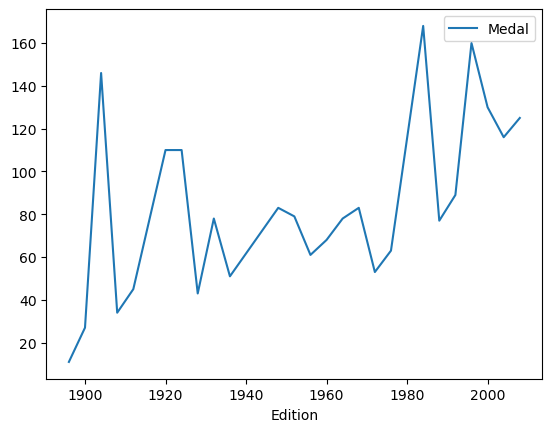

In [159]:
# This is my version, not sure if correct. Didn't even use stack or unstack
au.groupby('Edition').agg({'Medal': 'count'}).plot(kind = 'line');

In [160]:
# This is Jonathan's version
gu = oo[(oo.Medal == 'Gold') & (oo.NOC == 'USA')]
gu.groupby(['Edition', 'Gender']).size() # Group by both gender and edition to create multiple levels

Edition  Gender
1896     Men        11
1900     Men        26
         Women       1
1904     Men       140
         Women       6
1908     Men        34
1912     Men        45
1920     Men       103
         Women       7
1924     Men        95
         Women      15
1928     Men        34
         Women       9
1932     Men        61
         Women      17
1936     Men        44
         Women       7
1948     Men        75
         Women       8
1952     Men        72
         Women       7
1956     Men        57
         Women       4
1960     Men        51
         Women      17
1964     Men        63
         Women      15
1968     Men        59
         Women      24
1972     Men        37
         Women      16
1976     Men        56
         Women       7
1984     Men       106
         Women      62
1988     Men        49
         Women      28
1992     Men        57
         Women      32
1996     Men        59
         Women     101
2000     Men        68
         Women    

In [161]:
gu.groupby(['Edition', 'Gender']).size().unstack('Gender') # Even without gender here it appears to do it automatically. Curious.

Gender,Men,Women
Edition,,
1896,11.0,NaN
1900,26.0,1.0
1904,140.0,6.0
1908,34.0,NaN
1912,45.0,NaN
1920,103.0,7.0
1924,95.0,15.0
1928,34.0,9.0
1932,61.0,17.0


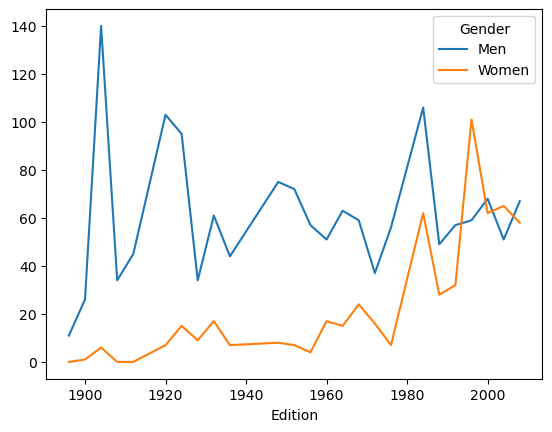

In [162]:
# fill_value gets rid of nulls
gu.groupby(['Edition', 'Gender']).size().unstack('Gender', fill_value= 0).plot(kind = 'line');

### 2. Plot the five athletes who have won the most gold medals over the history of the olympics

In [163]:
#My effort. Getting close, but not sure how to sum medals and sort
oo.groupby(['Athlete', 'Medal']).agg({'Athlete': ['count']}).unstack('Medal')

Athlete            
                            count            
Medal                      Bronze Gold Silver
Athlete                                      
AABYE, Edgar                  NaN  1.0    NaN
AALTONEN, Arvo Ossian         2.0  NaN    NaN
AALTONEN, Paavo Johannes      2.0  3.0    NaN
AAMODT, Ragnhild              NaN  1.0    NaN
AANING, Alf Lied              NaN  NaN    1.0
...                           ...  ...    ...
ÖSTERVOLD, Jan Olsen          NaN  1.0    NaN
ÖSTERVOLD, Kristian Olsen     NaN  1.0    NaN
ÖSTERVOLD, Ole Olsen          NaN  1.0    NaN
ÖSTMO, Ole                    2.0  NaN    2.0
ÖSTRAND, Per-Olof             1.0  NaN    NaN

[21413 rows x 3 columns]

In [164]:
# JF's first step. Interestingly, gets me the exact same thing. Forgot the fill_value though
g = oo.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value=0)

# Sorted by values. Still not in right order though.
gs = g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)
gs.head()

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2,14,0
"LATYNINA, Larisa",4,9,5
"NURMI, Paavo",0,9,3
"SPITZ, Mark",1,9,1
"LEWIS, Carl",0,9,1


In [165]:
# gss = golds sorted\
# ! Do not forget the second square bracket!!!!
gss = gs[['Gold', 'Silver', 'Bronze']]
gss

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0
...,...,...,...
"ZYCH, Boguslaw",0,0,1
"ZÄHRINGER, Klaus",0,0,1
"ZÜHLKE, Steffen",0,0,1


<AxesSubplot:xlabel='Athlete'>

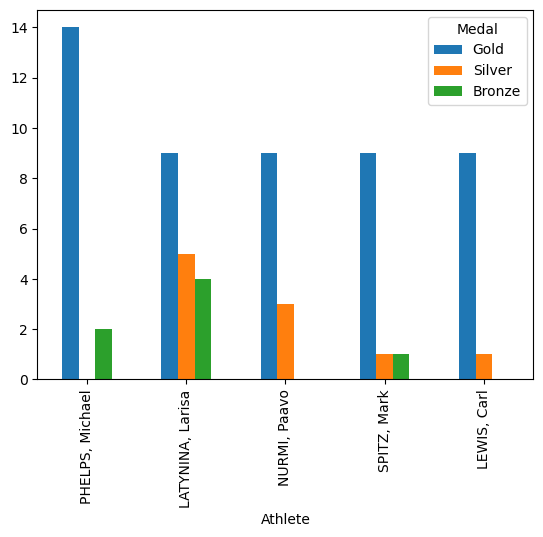

In [166]:
# If you forget head here, your shit is going to time out
gss.head().plot(kind = 'bar')

## Heatmaps

In [167]:
lo = oo[oo.Edition == 2008]
lo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold


In [168]:
# Group by with the size basically makes it an aggregate function in SQL
g = lo.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)
g = g.sort_values(['Gold', 'Silver', 'Bronze'], ascending = False)[['Gold', 'Silver', 'Bronze']]

In [169]:
g = g.transpose() # this makes the data horizontal
g

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


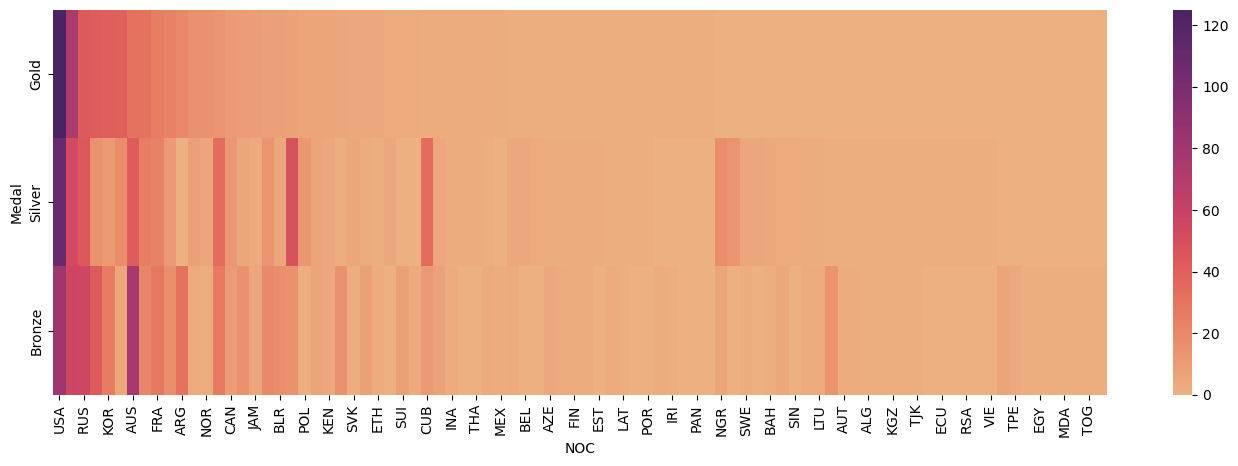

In [170]:
plt.figure(figsize=(17, 5)) # this resizes it to be bigger
sns.heatmap(g, cmap ='flare'); # Rocket is the opposite color spectrum

# Making your own colormap

In [171]:
from matplotlib.colors import ListedColormap

In [172]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

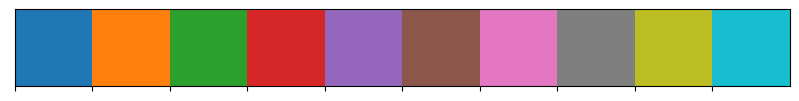

In [173]:
sns.palplot(sns.color_palette())

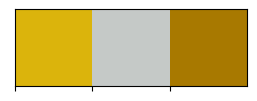

In [174]:
gsb = ['#dbb40c', '#c5c9c7', '#a87900']
mygsb = sns.palplot(sns.color_palette(gsb))

In [177]:
gsbCmap = sns.color_palette(gsb, as_cmap=True)

<AxesSubplot:xlabel='NOC', ylabel='Medal'>

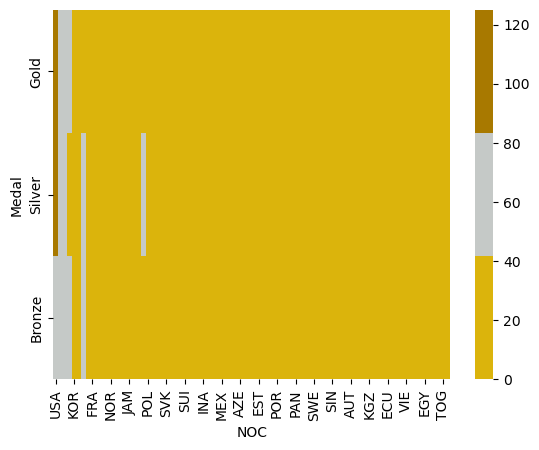

In [180]:
# On the right track, but too much work at the end of the day to keep doing it
sns.heatmap(g, cmap = gsbCmap)